<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to use weightwatcher to pick the right BERT model

### We compare BERT, RoBERTa, and XLNet







In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install transformers weightwatcher gwpy matplotlib==3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.1 MB/s 
     |████████████████████████████████| 48 kB 6.6 MB/s 
     |████████████████████████████████| 1.4 MB 51.7 MB/s 
     |████████████████████████████████| 13.1 MB 22.2 MB/s 
     |████████████████████████████████| 596 kB 87.0 MB/s 
     |████████████████████████████████| 6.6 MB 47.4 MB/s 
     |████████████████████████████████| 101 kB 12.1 MB/s 
     |████████████████████████████████| 13.1 MB 50.9 MB/s 
     |████████████████████████████████| 45 kB 3.5 MB/s 
     |████████████████████████████████| 51 kB 7.8 MB/s 
     |████████████████████████████████| 1.4 MB 59.0 MB/s 
     |████████████████████████████████| 1.4 MB 83.3 MB/s 
     |████████████████████████████████| 1.4 MB 64.1 MB/s 
     |████████████████████████████████| 1.4 MB 62.0 MB/s 
     |████████████████████████████████| 1.4 MB 73.2 MB/s 
     |██████████████████████████████

In [ ]:

from transformers import BertModel
bert = BertModel.from_pretrained('bert-base-uncased')


from transformers import RobertaModel
roberta = RobertaModel.from_pretrained("roberta-base")


from transformers import XLNetModel
xlnet = XLNetModel.from_pretrained("xlnet-base-cased")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 

In [ ]:
import weightwatcher as ww
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('weightwatcher') 
logger.setLevel(logging.INFO)

# loogging does not work properly yet

In [ ]:
%%capture

import warnings
warnings.filterwarnings('ignore')

watcher = ww.WeightWatcher(model=bert)
bert_details = watcher.describe()

watcher = ww.WeightWatcher(model=roberta)
roberta_details = watcher.describe()


watcher = ww.WeightWatcher(model=xlnet)
xlnet_details = watcher.describe()

INFO:weightwatcher:

python      version 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy       version 1.21.6
tensforflow version 2.8.2
keras       version 2.8.0
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'min_evals': 0, 'max_evals': None, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 

In [ ]:
""

''

In [ ]:
%%capture

import warnings
warnings.filterwarnings('ignore')

watcher = ww.WeightWatcher(model=bert)
bert_details = watcher.analyze(randomize=True, min_evals = 50)

watcher = ww.WeightWatcher(model=roberta)
roberta_details = watcher.analyze(randomize=True, min_evals = 50)

watcher = ww.WeightWatcher(model=xlnet)
xlnet_details = watcher.analyze(randomize=True, min_evals = 50)

INFO:weightwatcher:

python      version 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy       version 1.21.6
tensforflow version 2.8.2
keras       version 2.8.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'min_evals': 50, 'max_evals': None, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:genera

In [ ]:
watcher = ww.WeightWatcher(model=xlnet)
xlnet_details = watcher.analyze(randomize=True, min_evals = 50)

INFO:weightwatcher:

python      version 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
numpy       version 1.21.6
tensforflow version 2.8.2
keras       version 2.8.0
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': True, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': True, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'min_evals': 50, 'max_evals': None, 'mp_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues
INFO:weightwatcher:generating 1 replicas for each W of the random eigenvalues


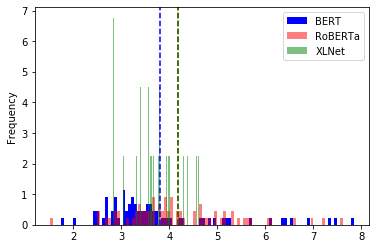

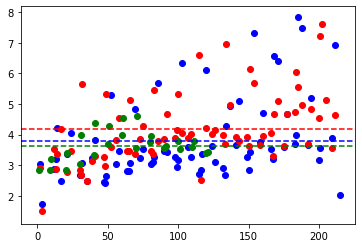

In [ ]:
MAX_ALPHA = 8

B = bert_details[(bert_details.alpha<MAX_ALPHA) & (bert_details.alpha>0)]
B.alpha.plot.hist(bins=100, label='BERT', density=True, color='blue')
plt.axvline(B.alpha.mean(), color='blue', linestyle='dashed')

R = roberta_details[(roberta_details.alpha<MAX_ALPHA) & (roberta_details.alpha>0)]
R.alpha.plot.hist(bins=100, label='RoBERTa' ,alpha=0.5, density=True, color='red')
plt.axvline(R.alpha.mean(), color='red', linestyle='dashed')

X = xlnet_details[(xlnet_details.alpha<MAX_ALPHA) & (roberta_details.alpha>0)]
X.alpha.plot.hist(bins=100, label='XLNet' ,alpha=0.5, density=True, color='green')
plt.axvline(R.alpha.mean(), color='green', linestyle='dashed')

plt.legend()
plt.show()

x = B.layer_id.to_numpy()
y = B.alpha.to_numpy()
plt.scatter(x,y,color='blue')
plt.axhline(np.mean(y), color='blue', linestyle='dashed')

x = R.layer_id.to_numpy()
y = R.alpha.to_numpy()
plt.scatter(x,y,color='red')
plt.axhline(np.mean(y), color='red', linestyle='dashed')

x = X.layer_id.to_numpy()
y = X.alpha.to_numpy()
plt.scatter(x,y,color='green')
plt.axhline(np.mean(y), color='green', linestyle='dashed')
#plt.show()




In [ ]:
while True:
  pass